#### DATA 620 - Assignment 4

Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:


- [Brief Description](http://vlado.fmf.uni-lj.si/pub/networks/data/ucinet/ucidata.htm#davis). Small “musty” datasets like that from this 1941 study have proven very valuable in testing and comparing new network algorithms.
- [Dataset](http://vlado.fmf.uni-lj.si/pub/networks/data/Ucinet/davis.dat)
- Python code to create dataset: https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_davis_club.html

What can you infer about the relationships between (1) the women, and (2) the social events?  


##### **Import Libraries**

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite
import pandas as pd
import numpy as np

##### **Generate Bi-adjacency matrix**

In [2]:

G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


#### **Projection of graph onto women nodes**

In [3]:

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")



#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price


#### **Project graph onto women nodes in a weighted network**

In [4]:

# project bipartite graph onto women nodes keeping number of co-occurrence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")



#Friend meetings, Member
50 Evelyn Jefferson
45 Laura Mandeville
57 Theresa Anderson
46 Brenda Rogers
24 Charlotte McDowd
32 Frances Anderson
36 Eleanor Nye
31 Pearl Oglethorpe
40 Ruth DeSand
38 Verne Sanderson
33 Myra Liddel
37 Katherina Rogers
46 Sylvia Avondale
43 Nora Fayette
34 Helen Lloyd
24 Dorothy Murchison
14 Olivia Carleton
14 Flora Price


##### **Graph Network**

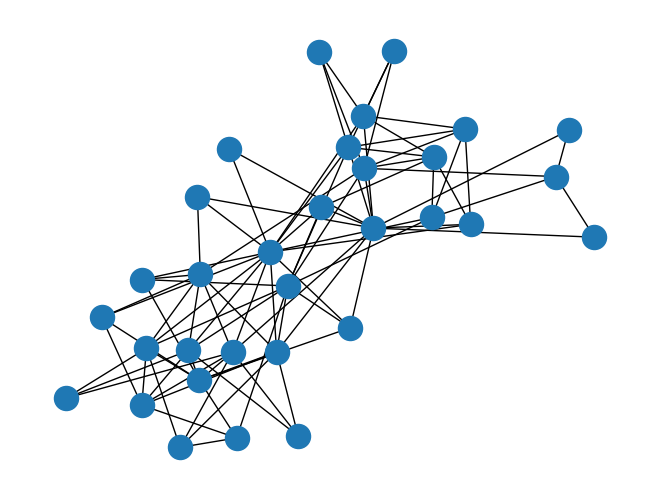

In [5]:

pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
nx.draw(G, pos, )
plt.show()

##### **Exploratory Analysis**



I started by converting the bi-adjacency matrix into a dataframe to allow for easier visualization of the data

In [6]:
relationship_df = pd.DataFrame(bipartite.biadjacency_matrix(G, women, clubs).toarray(),index=women, columns=clubs)

In [7]:
relationship_df

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14
Evelyn Jefferson,1,1,1,1,1,1,0,1,1,0,0,0,0,0
Laura Mandeville,1,1,1,0,1,1,1,1,0,0,0,0,0,0
Theresa Anderson,0,1,1,1,1,1,1,1,1,0,0,0,0,0
Brenda Rogers,1,0,1,1,1,1,1,1,0,0,0,0,0,0
Charlotte McDowd,0,0,1,1,1,0,1,0,0,0,0,0,0,0
Frances Anderson,0,0,1,0,1,1,0,1,0,0,0,0,0,0
Eleanor Nye,0,0,0,0,1,1,1,1,0,0,0,0,0,0
Pearl Oglethorpe,0,0,0,0,0,1,0,1,1,0,0,0,0,0
Ruth DeSand,0,0,0,0,1,0,1,1,1,0,0,0,0,0
Verne Sanderson,0,0,0,0,0,0,1,1,1,0,0,1,0,0


Next, I look at the data to determine the count of relationships that each person has as well as the number of attendees at each of the events. This can help develop a baseline and glean any information with respect to the indiviaul components of the network

***Count of relationships for each member***

In [8]:
relationship_df.sum(axis='columns')

Evelyn Jefferson     8
Laura Mandeville     7
Theresa Anderson     8
Brenda Rogers        7
Charlotte McDowd     4
Frances Anderson     4
Eleanor Nye          4
Pearl Oglethorpe     3
Ruth DeSand          4
Verne Sanderson      4
Myra Liddel          4
Katherina Rogers     6
Sylvia Avondale      7
Nora Fayette         8
Helen Lloyd          5
Dorothy Murchison    2
Olivia Carleton      2
Flora Price          2
dtype: int64

***Number of Attendees at each event***

In [9]:
relationship_df.sum()

E1      3
E2      3
E3      6
E4      4
E5      8
E6      8
E7     10
E8     14
E9     12
E10     5
E11     4
E12     6
E13     3
E14     3
dtype: int64

***Percent of members attending each event***

In [10]:
relationship_df.sum()/len(women)

E1     0.166667
E2     0.166667
E3     0.333333
E4     0.222222
E5     0.444444
E6     0.444444
E7     0.555556
E8     0.777778
E9     0.666667
E10    0.277778
E11    0.222222
E12    0.333333
E13    0.166667
E14    0.166667
dtype: float64

***Create dataframe of projection of network on women nodes***

In [11]:
friends_df = pd.DataFrame([{'member':w,'num_friends':W.degree(w)} for w in women])

In [18]:
friends_df.sort_values(by='num_friends', ascending=False).reset_index(drop=True)

,member,num_friends
0,Evelyn Jefferson,17
1,Ruth DeSand,17
2,Helen Lloyd,17
3,Nora Fayette,17
4,Sylvia Avondale,17
5,Verne Sanderson,17
6,Theresa Anderson,17
7,Pearl Oglethorpe,16
8,Myra Liddel,16
9,Katherina Rogers,16


In [12]:
np.mean(friends_df['num_friends'])

15.444444444444445

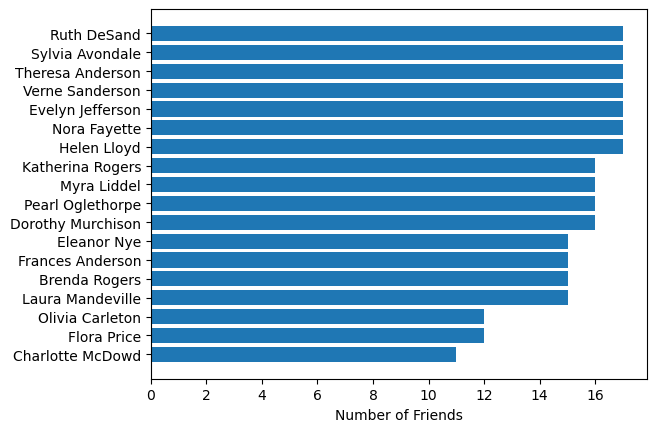

In [19]:
x = friends_df.sort_values(by='num_friends')['member']
y = friends_df.sort_values(by='num_friends')['num_friends']
plt.barh(x,y)
plt.xlabel('Number of Friends')
plt.show()

***Create dataframe of projection of weighted network on women nodes***

In [14]:
meetings_df = pd.DataFrame([{'member':w,'friend_meetings':W.degree(w,weight='weight')} for w in women])

In [15]:
meetings_df.sort_values(by='friend_meetings', ascending=False).reset_index(drop=True)

,member,friend_meetings
0,Theresa Anderson,57
1,Evelyn Jefferson,50
2,Brenda Rogers,46
3,Sylvia Avondale,46
4,Laura Mandeville,45
5,Nora Fayette,43
6,Ruth DeSand,40
7,Verne Sanderson,38
8,Katherina Rogers,37
9,Eleanor Nye,36


##### **Conclusion**

*What can you infer about the relationships between (1) the women, and (2) the social events?*



Some of the observations made from this data are:
- One of the main observtions is that it appears that social events E7. E8. and E9 appear to be the main events in the community. 
- These events were attended by over 50% of the women in the club, with events E7 having 77% attendance and E8 67% attendance. 
- From this, it an be imagined that these events were either mandatory events or major flagship events - like a gala or some larger fundraising event. 
- Also, we notice that There are some members, like Evelyn Jefferson and Brenda Rogers who are very active within this group in terms of the number of events that they attended, while others like Flora Price and Olivia Carleton only attended a couple. 
- Theresa Anderson has the most connections with other members over time. She is probably an officer of the club and thus responsible for being at many of the meetings or events. But as such, she is also a very connected person and thus could be considered very important in the community as well as within the organization
- The fact that Olivia Carleton and Flora Price have such a significantly lower number of connections than the others in the group is very interesting. Perhaps they don't really like the group - maybe they are just a part of the organization because of some forced relationship, for example their husbands may be important society members. As noted earlier they have only attended a couple events - any only those that are attended by 50% or more the ladies in this group

